In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(1, 2, 2, 1)


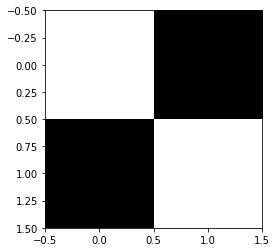

In [2]:
sess = tf.InteractiveSession()
image = np.array([[[[0.5],[1]],
                    [[1],[0.5]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(2,2), cmap='Greys')

weight.shape = 2 filters (1 , 1 , 1)
![image](https://cloud.githubusercontent.com/assets/901975/23337561/56236b68-fc2d-11e6-956e-bc24325a824d.png)

(1, 1, 1, 2)
[[ 0.05  0.1 ]
 [ 0.1   0.05]]
[[ 0.25  0.5 ]
 [ 0.5   0.25]]


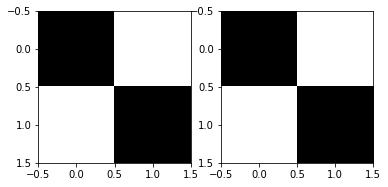

In [34]:
weight = tf.constant([[[[0.1, 0.5]]]])
print(weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

(1, 1, 1, 2)
[[ 0.5]]
[[ 1.]]


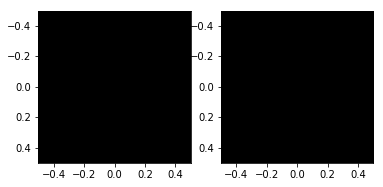

In [29]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='VALID')
print(pool.shape)
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    print(one_img.reshape(1,1))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(1,1), cmap='gray')

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


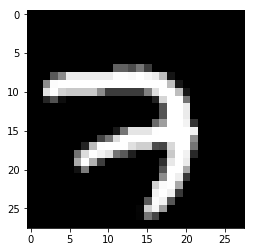

In [31]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

Tensor("Conv2D_15:0", shape=(1, 14, 14, 5), dtype=float32)


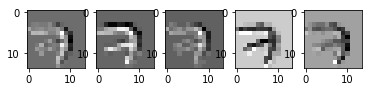

In [32]:
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

In [ ]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[
                        1, 2, 2, 1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14, 14))